In [1]:
using Plots

Ahora, tenemos que el método de RK5 es un método más avanzado para resolver ecuaciones diferenciales ordinarias con condiciones iniciales. 

Al igual que con el método `RK4`, este puede resolver ecuaciones diferenciales, pero con el hecho de que este es más exacto.

Demos primero una breve introducción:

* Dos métodos explícitos de Runge-Kutta de orden 5. El primero de estos dos métodos  fue propuesto por Butcher, y el segundo por Merson. Lo que se dio, fue que el método de Butcher necesita 6 evaluaciones de la función `f`, mientas que el método de Merson necesita solamente 5 evaluaciones de la función f.

Nosotros ocuparemos el método de Butcher.

Este tiene la siguiente regla: 

$$
\mathbf{x}_{i+1} = \mathbf{x}_i +  \frac{1}{90}(7\mathbf{k}_1 + 32\mathbf{k}_3 + 12\mathbf{k}_4 + 32\mathbf{k}_5 + 7\mathbf{k}_6)h
$$

Donde

$$
\mathbf{k}_{1}= \mathbf{f}(\mathbf{x}_{i}, \mathbf{t}_{i})\\  
\mathbf{k}_{2}= \mathbf{f}(\mathbf{x}_{i} + \frac{\mathbf{k}_1 h}{4} , t_{i}+\frac{h}{4})\\
\mathbf{k}_{3}= \mathbf{f}(\mathbf{x}_{i} + \frac{\mathbf{k}_1 h}{8} + \frac{\mathbf{k}_2 h}{8}, t_{i}+ \frac{h}{4})\\
\mathbf{k}_{4}= \mathbf{f}(\mathbf{x}_{i}  - \frac{\mathbf{k}_2 h}{2} + \mathbf{k}_3 h ,t_{i}+ \frac{h}{2})\\
\mathbf{k}_{5}= \mathbf{f}(\mathbf{x}_{i} + \frac{3 \mathbf{k}_1 h}{16} + \frac{9 \mathbf{k}_4 h}{16}, t_{i}+ \frac{3h}{4})\\
\mathbf{k}_{6}= \mathbf{f}(\mathbf{x}_{i} - \frac{3 \mathbf{k}_1 h}{7} + \frac{2 \mathbf{k}_2 h}{7} + \frac{12 \mathbf{k}_3 h}{7} - \frac{12 \mathbf{k}_4 h}{7} + \frac{8 \mathbf{k}_5 h}{7}, t_{i}+h)
$$


Una vez teniendo la expresión, hacemos el código correspondiente.

In [2]:
function RK5(f,x0,t0,tf,h)
    #Creamos una matriz donde se almacenarán los valores de x con los respectos tiempos:
    ts = range(t0, stop = tf, step = h)
    m = length(x0)
    n = length(ts)
    X = zeros(n,m)
    # Le especificamos los valores iniciales, además de prealocar en memoria haciendo una matríz de puros ceros
    X[1,:] = x0
    for i in 2:n
        k1 = f(X[i-1,:], ts[i-1])
        k2 = f(X[i-1,:] + (k1 * h)/4, ts[i-1] + h/4)
        k3 = f(X[i-1,:] + (k1*h)/8 + (k2 * h)/8, ts[i-1]+h/4)
        k4 = f(X[i-1,:] - (k2 * h)/2 + k3*h, ts[i-1] + h/2)
        k5 = f(X[i-1,:] + (3*k1*h)/16 + (9*k4*h)/16, ts[i-1] + (3*h)/4)
        k6 = f(X[i-1,:] + (-3*k1*h + 2*k2*h + 12*k3*h - 12*k4*h + 8*k5*h)/7 , ts[i-1] + h)
        X[i,:] = X[i-1,:] + (h/90) * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
    end
    return ts, X
end

RK5 (generic function with 1 method)

# Caso 1: Péndulo ideal

Para este proyecto se tomarán las siguientes aproximaciones:


1.   Primero la componente z de la tensión es bien aproximada por su magnitud $T_{z} = T cos  (\beta) \approx T$
2.   Para oscilaciones pequeñas $T_{z}= mg$

Entonces las tres componentes de la Tensión, de acuerdo al diagrama quedarian:

1.  $T_{x} = -T \frac{x}{L}$
2.  $T_{y} = -T \frac{x}{L}$
3.  $T_{z} \approx T$

Ahora, conviene escribir la velocidad angular en función de la latitud:

$\vec{\omega} = \hat{x}(cos\beta) + \hat{z}(\omega sen \beta)$

Ahora obtenemos los productos de la velocidad con la velocidad angular, componente a componente:

1.  $(\vec{\omega} \times \vec{v})_x = - \dot{y} \omega  sen\beta$
2.  $(\vec{\omega} \times \vec{v})_y = \dot{x} \omega  sen\beta$
3.  $(\vec{\omega} \times \vec{v})_z = - \dot{y} \omega  cos\beta$

Tomando en cuenta todo el planteamiento anterior y las  aproximaciones se tiene  el sistema de ecuaciones:


1.  $\ddot{x} = - \frac{g}{L}x + 2\dot{y}\omega sen\beta$
2.  $\ddot{y} = - \frac{g}{L}y - 2\dot{x}\omega sen\beta$

Estas ecuaciones diferenciales estan acopladas, dado que Python no trabaja con ecuaciones diferenciales de segundo grado, se hará un cambio de variable para ahora tener dos ecuaciones más:

1.  $\dot{v}_x = - \frac{g}{L}x + 2v_x\omega sen\beta$
2.  $\dot{v}_y = - \frac{g}{L}y - 2v_y\omega sen\beta$
3.  $v_{x}=\dot{x}$
4.  $v_{y}=\dot{y}$Tomando en cuenta todo el planteamiento anterior y las  aproximaciones se tiene  el sistema de ecuaciones:


1.  $\ddot{x} = - \frac{g}{L}x + 2\dot{y}\omega sen\beta$
2.  $\ddot{y} = - \frac{g}{L}y - 2\dot{x}\omega sen\beta$

Estas ecuaciones diferenciales estan acopladas, dado que Python no trabaja con ecuaciones diferenciales de segundo grado, se hará un cambio de variable para ahora tener dos ecuaciones más:

1.  $\dot{v}_x = - \frac{g}{L}x + 2v_x\omega sen\beta$
2.  $\dot{v}_y = - \frac{g}{L}y - 2v_y\omega sen\beta$
3.  $v_{x}=\dot{x}$
4.  $v_{y}=\dot{y}$

In [3]:
# Definiremos primero nuestra función del péndulo ideal, en esta, tendremoms
# que ingresar los siguientes datos:
# 1.- Un arreglo en el cual estarán las condiciones iniciales
# 2.- El valor de la longitud L
# 3.- Omega
# 4.- Theta
# 5.- El tiempo
# Para que quede más claro cómo se organizarán las condiciones iniciales:
# x0 = [x,y,dx,dy]
function Pideal(omega, theta, L, x0, t0, tf,h)
    g = 9.81
    w2 = g/L
    function solPideal(X,t)
        dx = 2*omega*sin(theta)*X[4] - w2*X[1]
        dy = -2*omega*sin(theta)*X[3] - w2*X[2]
        # Lo que nos regresará será vx, vy, dvx, dvy
        return [X[3], X[4], dx,dy]
    end
    return RK5(solPideal,x0, t0,tf,h)
end

Pideal (generic function with 1 method)

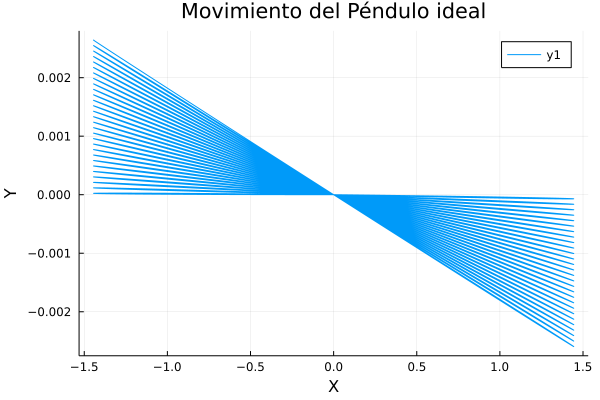

In [55]:
# Supongamos que el largo del cable es de 50
L = 28
theta = 5*pi/180
t0 = 0
tf = 300
h = 1e-1
# Y consideramos la velocidad angular de la tierra, que es de Ω= 7x10⁻⁵
O = 7e-5
x0 = [L*sin(theta), 0,0,0]
ts, X = Pideal(O,theta,L,x0,t0,tf,h)
#Veamos cómo cambia el péndulo conforme a la posición
plot(X[:,3], X[:,4], xlabel = "X", ylabel = "Y", title = "Movimiento del Péndulo ideal")

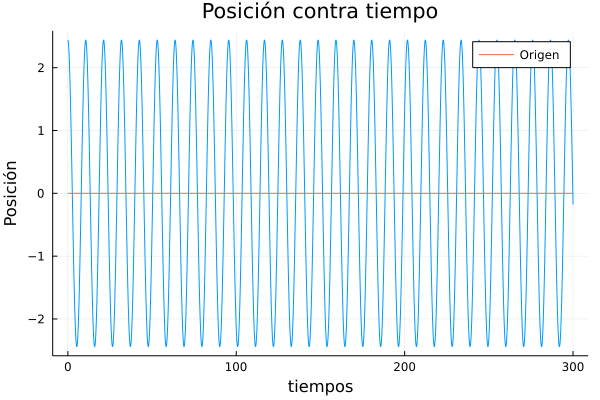

In [17]:
# Veamos cómo se mueve con respecto al tiempo
plot(ts, X[:,1], xlabel = "tiempos", ylabel = "Posición", title = "Posición contra tiempo", label = :none)
plot!(ts, [0 for i in ts], label = "Origen")

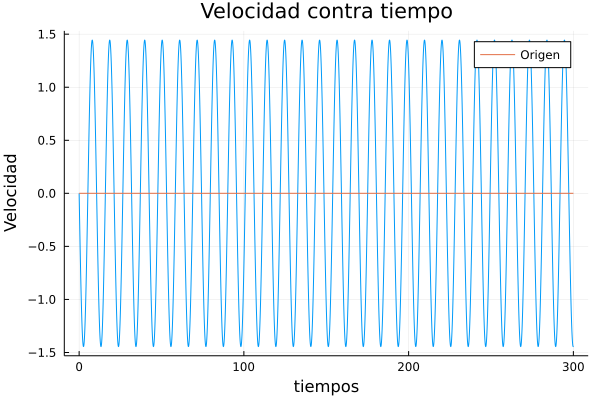

In [18]:
plot(ts, X[:,3], xlabel = "tiempos", ylabel = "Velocidad", title = "Velocidad contra tiempo", label = :none)
plot!(ts, [0 for i in ts], label = "Origen")

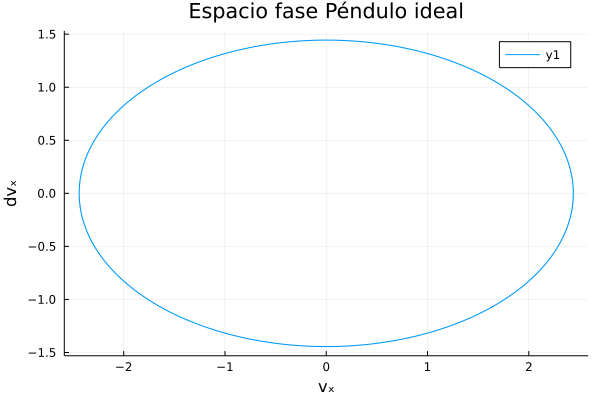

In [57]:
plot(X[:,1], X[:,3], xlabel = "vₓ", ylabel = "dvₓ", title = "Espacio fase Péndulo ideal")

┌ Info: Saved animation to 
│   fn = C:\Users\Win 10\Favorites\Facultad\Fisica Computacional\tmp.gif
└ @ Plots C:\Users\Win 10\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Win 10\\Favorites\\Facultad\\Fisica Computacional\\tmp.gif")
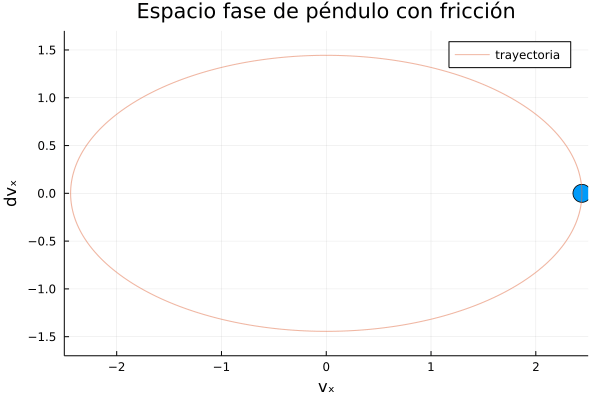

In [36]:
anim = @animate for i in 1:30
    scatter([X[i,1]], [X[i,3]], 
        xlabel = "vₓ", 
        ylabel = "dvₓ", 
        title = "Espacio fase de péndulo con fricción", 
        label = :none,
        xlimits = (-2.5,2.5),
        ylimits = (-1.7, 1.7),
        markersize = 10
    )
    plot!(X[:,1], X[:,3], alpha = 0.5, label = "trayectoria")
end

gif(anim,fps =30 )

# Caso 2: Péndulo con fricción 

Sabemos que no existe un pendulo ideal a menos que este esté en el vacio o en algún otro lado tal que su energía siempre se consever. Pero como vamos a simular, estaría bien que lo hicíeramos lo más real posible. Para esto, consideremos la resistenciadel aire, ya que es un factor muy importante.

Para esto, consideremos el número de Reynolds

$$
R_E = \frac{2v_a \rho R }{\mu}
$$

Con $v_a$ la velocidad del péndulo, $\rho = 1.189 kg * m^{-3}$ la densidad del aire, $R=0.68$m el radio del péndulo, $\mu = 1.1983 x10^{-5} N.s.m^{-2}$ la viscosidad dinámica del aire a una temperatura de T=25° 

Dependiendo del tipo de aire que esté alrededor del péndulo, el péndulo tendrá dos tipos de fricción:

El primero es llamado el arrastre de Stokes $F_d$, una fuerza de fricción que es proporcional a la velocidad del péndulo

$$
F_d = 6\pi \mu R v_a
$$

Entonces, añadamos esta nueva fuerza a nuestra ecuación del péndulo, la cual nos quedará

1.  $\dot{v}_x = - \frac{g}{L}x + 2v_y\omega sen\beta - \frac{6 \pi \mu R}{m}v_x$
2.  $\dot{v}_y = - \frac{g}{L}y - 2v_x\omega sen\beta  - \frac{6 \pi \mu R}{m}v_y$

In [5]:
function Pfriccion(omega,theta,m,R,L,x0,t0,tf,h)
    g = 9.81
    w2 = g/L
    μ = 1.983
    S = (6*pi*μ*R)/m
    function solPfriccion(X,t)
        dx = 2*omega*sin(theta)*X[4] - w2*X[1] - S*X[3] 
        dy = -2*omega*sin(theta)*X[3] - w2*X[2] - S*X[4]
        # Lo que nos regresará será vx, vy, dvx, dvy
        return [X[3], X[4], dx,dy]
    end
    return RK5(solPfriccion,x0, t0,tf,h)
end

Pfriccion (generic function with 1 method)

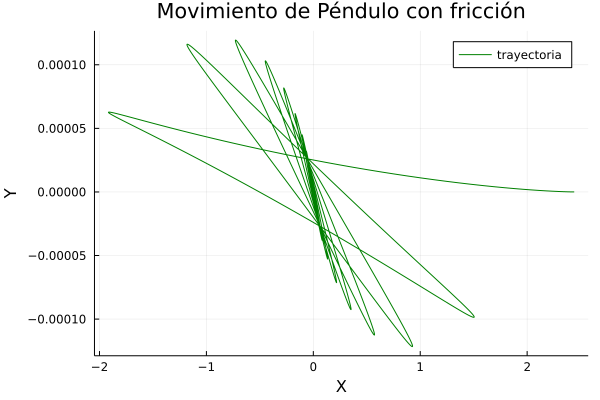

In [61]:
# Para este ejemplo, consideremos el péndulo que está en México, en Santiago de Querétaro, Querétaro con 
# m = 28 kg
# R = 0.68 m 
# Consideremos las mismas condiciones inciales para ver cómo es que varía de uno a otro
L = 28
theta = 5*pi/180
t0 = 0
tf = 300
h = 1e-1
# Y consideramos la velocidad angular de la tierra, que es de Ω= 7x10⁻⁵
O = 7e-5
m = 280
R = 0.68
x0 = [L*sin(theta), 0,0,0]
ts, X1 = Pfriccion(O,theta,m,R,L,x0,t0,tf,h)
#Veamos cómo cambia el péndulo conforme a la posición
plot(X1[:,1], X1[:,2], xlabel = "X", ylabel = "Y", title = "Movimiento de Péndulo con fricción", label = "trayectoria", color = "green")

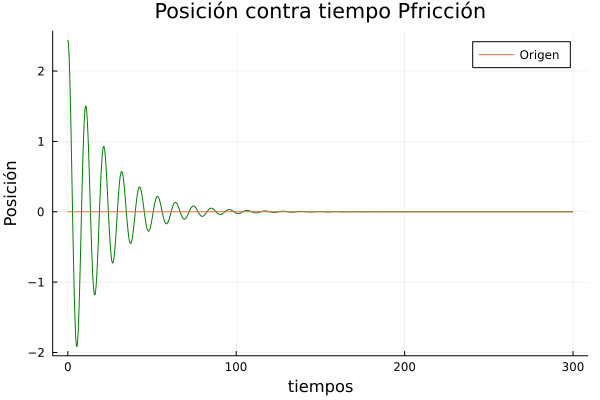

In [62]:
# Veamos cómo se mueve con respecto al tiempo
plot(ts, X1[:,1], xlabel = "tiempos", ylabel = "Posición", title = "Posición contra tiempo Pfricción", label = :none, color = "green")
plot!(ts, [0 for i in ts], label = "Origen")

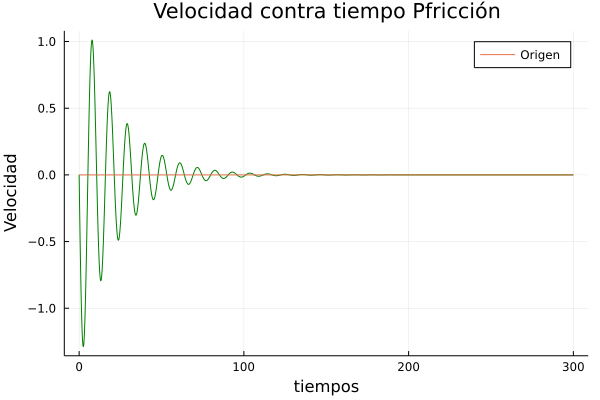

In [63]:
plot(ts, X1[:,3], xlabel = "tiempos", ylabel = "Velocidad", title = "Velocidad contra tiempo Pfricción", label = :none, color = "green")
plot!(ts, [0 for i in ts], label = "Origen")

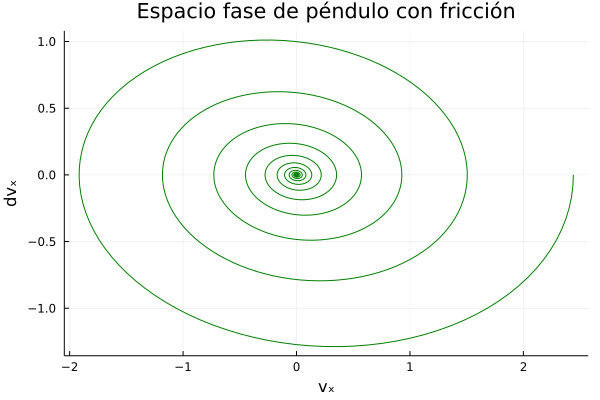

In [64]:
plot(X1[:,1], X1[:,3], xlabel = "vₓ", ylabel = "dvₓ", title = "Espacio fase de péndulo con fricción", label = :none, color = "green")

┌ Info: Saved animation to 
│   fn = C:\Users\Win 10\Favorites\Facultad\Fisica Computacional\tmp.gif
└ @ Plots C:\Users\Win 10\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Win 10\\Favorites\\Facultad\\Fisica Computacional\\tmp.gif")
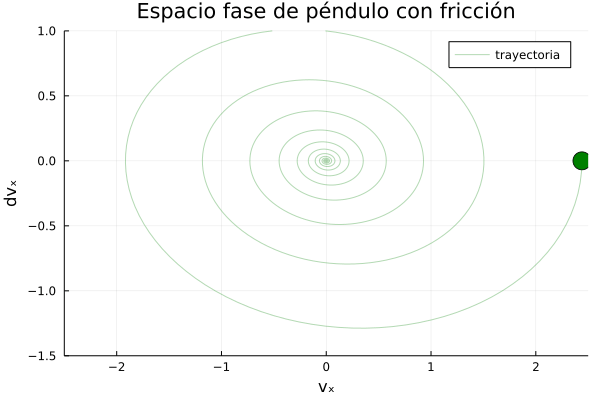

In [65]:
#La verdad es que mi computadora no es la mejor del mundo, pero 
# para que se pueda apreciar lo que está pasando y si es realmente la 
# Trayectoria corran el siguiente código para que se aprecie mejor

#anim = @animate for i in 1:length(ts)
anim = @animate for i in 1:30
    scatter([X1[i,1]], [X1[i,3]], 
        xlabel = "vₓ", 
        ylabel = "dvₓ", 
        title = "Espacio fase de péndulo con fricción", 
        label = :none,
        xlimits = (-2.5,2.5),
        ylimits = (-1.5,1),
        markersize = 10, color = "green"
    )
    plot!(X1[:,1], X1[:,3], alpha = 0.3, label = "trayectoria", color = "green")
end

gif(anim,fps =30 )

# Caso 3. Fricción lineal



In [19]:
function Pfriccioncuad(omega,theta,m,R,L,x0,t0,tf,h)
    g = 9.81
    w2 = g/L
    ρ = 1.189
    Cd = 0.47
    S = (1/(2*m))*(ρ * Cd * pi * R^2)
    function solPfriccioncuad(X,t)
        dx = 2*omega*sin(theta)*X[4] - w2*X[1] - S*X[3]*abs(X[3]) 
        dy = -2*omega*sin(theta)*X[3] - w2*X[2] - S*X[4]*abs(X[4])
        # Lo que nos regresará será vx, vy, dvx, dvy
        return [X[3], X[4], dx,dy]
    end
    return RK5(solPfriccioncuad,x0, t0,tf,h)
end

Pfriccioncuad (generic function with 1 method)

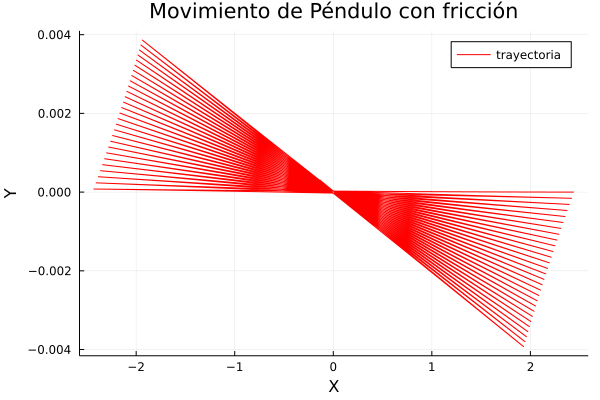

In [58]:
# Para este ejemplo, consideremos el péndulo que está en México, en Santiago de Querétaro, Querétaro con 
# m = 28 kg
# R = 0.68 m 
# Consideremos las mismas condiciones inciales para ver cómo es que varía de uno a otro
L = 28
theta = 5*pi/180
t0 = 0
tf = 300
h = 1e-1
# Y consideramos la velocidad angular de la tierra, que es de Ω= 7x10⁻⁵
O = 7e-5
m = 280
R = 0.68
x0 = [L*sin(theta), 0,0,0]
ts, X2 = Pfriccioncuad(O,theta,m,R,L,x0,t0,tf,h)
#Veamos cómo cambia el péndulo conforme a la posición
plot(X2[:,1], X2[:,2], xlabel = "X", ylabel = "Y", title = "Movimiento de Péndulo con fricción", label = "trayectoria", color = "red")

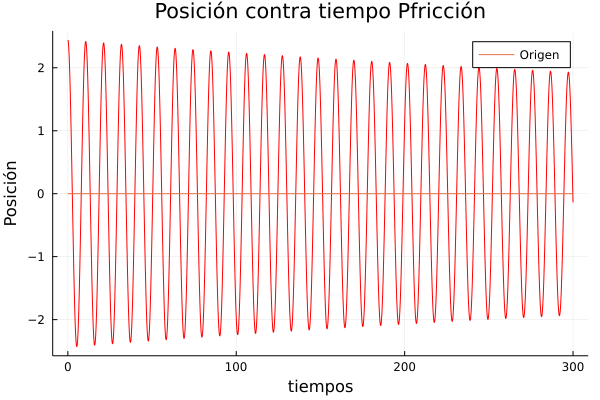

In [59]:
# Veamos cómo se mueve con respecto al tiempo
plot(ts, X2[:,1], xlabel = "tiempos", ylabel = "Posición", title = "Posición contra tiempo Pfricción", label = :none, color = "red")
plot!(ts, [0 for i in ts], label = "Origen")

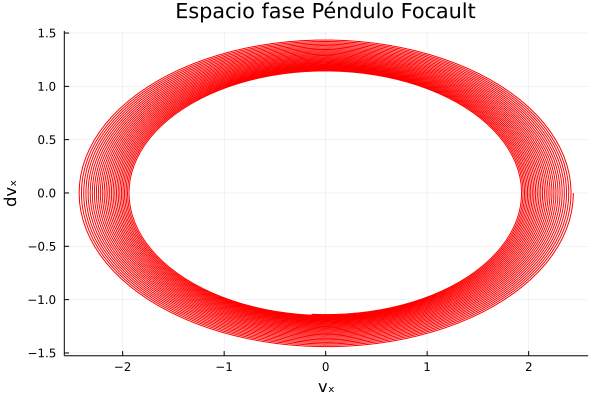

In [60]:
plot(X2[:,1], X2[:,3], xlabel = "vₓ", ylabel ="dvₓ", label = :none, title = "Espacio fase Péndulo Focault", color = "red")

┌ Info: Saved animation to 
│   fn = C:\Users\Win 10\Favorites\Facultad\Fisica Computacional\tmp.gif
└ @ Plots C:\Users\Win 10\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Win 10\\Favorites\\Facultad\\Fisica Computacional\\tmp.gif")
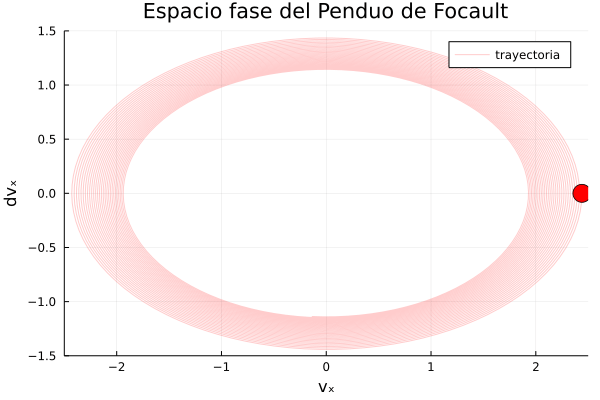

In [67]:
#La verdad es que mi computadora no es la mejor del mundo, pero 
# para que se pueda apreciar lo que está pasando y si es realmente la 
# Trayectoria corran el siguiente código para que se aprecie mejor

#anim = @animate for i in 1:length(ts)
anim = @animate for i in 1:30
    scatter([X2[i,1]], [X2[i,3]], 
        xlabel = "vₓ", 
        ylabel = "dvₓ", 
        title = "Espacio fase del Penduo de Focault", 
        label = :none,
        xlimits = (-2.5,2.5),
        ylimits = (-1.5,1.5),
        markersize = 10,
        color = "red"
    )
    plot!(X2[:,1], X2[:,3], alpha = 0.2, label = "trayectoria", color = "red")
end

gif(anim,fps =30 )

┌ Info: Saved animation to 
│   fn = C:\Users\Win 10\Favorites\Facultad\Fisica Computacional\tmp.gif
└ @ Plots C:\Users\Win 10\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Win 10\\Favorites\\Facultad\\Fisica Computacional\\tmp.gif")
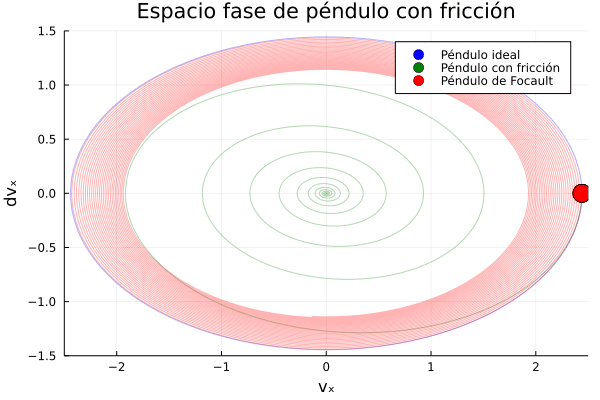

In [51]:
# Ahora, veamos cómo es el comportamiento de los tres péndulos, tanto en su plano fase como en 
# su desplazamiento, para ver el comportamiento de cada uno


#La verdad es que mi computadora no es la mejor del mundo, pero 
# para que se pueda apreciar lo que está pasando y si es realmente la 
# Trayectoria corran el siguiente código para que se aprecie mejor


# NO OLVIDES CAMBIAR LOS VALORES DE i PARA VER MEJOR LA ANIMACIÓN
# PARA ESO BORRA EL GATO DE AQUÍ ABAJO Y COMENTAR EL OTRO!!!!
#anim = @animate for i in 1:length(ts)
anim = @animate for i in 1:150
    # Esto será para el plano fase del péndulo ideal
    alpha = 0.3
    scatter([X[i,1]], [X[i,3]], 
        xlabel = "vₓ", 
        ylabel = "dvₓ", 
        title = "Espacio fase de péndulo con fricción", 
        label = "Péndulo ideal",
        xlimits = (-2.5,2.5),
        ylimits = (-1.5,1.5),
        markersize = 10,
        color = "blue"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X[:,1], X[:,3], alpha = alpha,label = :none, color = "blue")
    
    
    
    #Pasamos ahora con el péndulo con mayor fricción
    scatter!([X1[i,1]], [X1[i,3]], 
        label = "Péndulo con fricción",
        markersize = 10,
        color = "green"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X1[:,1], X1[:,3], alpha = alpha, label = :none, color = "green")
    
    
    
    #Por último pero no menos importante, con el péndulo que más se asemeja al péndulo de Focault
    scatter!([X2[i,1]], [X2[i,3]], 
        label = "Péndulo de Focault",
        markersize = 10,
        color = "red"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X2[:,1], X2[:,3], alpha = alpha, label = :none, color = "red")    
end

gif(anim,fps =30 )

┌ Info: Saved animation to 
│   fn = C:\Users\Win 10\Favorites\Facultad\Fisica Computacional\tmp.gif
└ @ Plots C:\Users\Win 10\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Win 10\\Favorites\\Facultad\\Fisica Computacional\\tmp.gif")
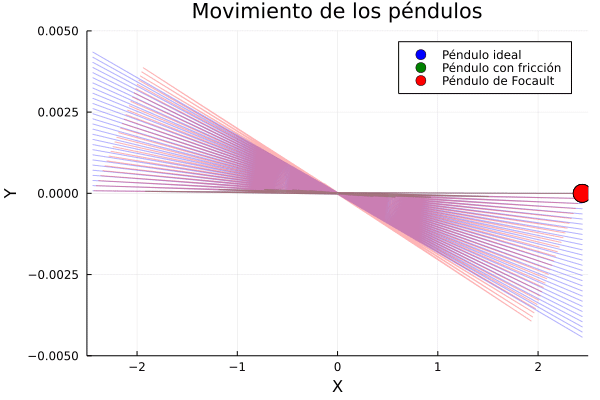

In [53]:
# De manera análoga, veremos cómo es con las posiciones


# Ahora, veamos cómo es el comportamiento de los tres péndulos, tanto en su plano fase como en 
# su desplazamiento, para ver el comportamiento de cada uno


#La verdad es que mi computadora no es la mejor del mundo, pero 
# para que se pueda apreciar lo que está pasando y si es realmente la 
# Trayectoria corran el siguiente código para que se aprecie mejor


# NO OLVIDES CAMBIAR LOS VALORES DE i PARA VER MEJOR LA ANIMACIÓN
# PARA ESO BORRA EL GATO DE AQUÍ ABAJO Y COMENTAR EL OTRO!!!!
#anim = @animate for i in 1:length(ts)
anim = @animate for i in 1:150
    # Esto será para el plano fase del péndulo ideal
    alpha = 0.3
    scatter([X[i,1]], [X[i,2]], 
        xlabel = "X", 
        ylabel = "Y", 
        title = "Movimiento de los péndulos", 
        label = "Péndulo ideal",
        xlimits = (-2.5,2.5),
        ylimits = (-0.005,0.005),
        markersize = 10,
        color = "blue"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X[:,1], X[:,2], alpha = alpha,label = :none, color = "blue")
    
    
    
    #Pasamos ahora con el péndulo con mayor fricción
    scatter!([X1[i,1]], [X1[i,2]], 
        label = "Péndulo con fricción",
        markersize = 10,
        color = "green"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X1[:,1], X1[:,2], alpha = alpha, label = :none, color = "green")
    
    
    
    #Por último pero no menos importante, con el péndulo que más se asemeja al péndulo de Focault
    scatter!([X2[i,1]], [X2[i,2]], 
        label = "Péndulo de Focault",
        markersize = 10,
        color = "red"
    )
    #Con su respectiva trayectoria del mismo color
    plot!(X2[:,1], X2[:,2], alpha = alpha, label = :none, color = "red")    
end

gif(anim,fps =30 )